# Make a catalog to cross-match to for astrometry

Gaia does not seem to have enough stars, nor  does 2MASS

VVV does, but the matches aren't good enough, so we need to use our own...

In [1]:
import numpy as np

In [2]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from astropy.table import Table
from astropy.io import fits
from astropy import wcs
from astropy.wcs import WCS
import regions
from astroquery.vizier import Vizier

In [3]:
from astropy.visualization import quantity_support

In [4]:
%matplotlib inline
import pylab as pl

In [5]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [6]:
fov = regions.Regions.read(f'{basepath}/regions/nircam_brick_fov.reg')

In [7]:
coord = fov[0].center
height = fov[0].height
width = fov[0].width
height, width = width, height # CARTA wrote it wrong
coord, width, height

(<SkyCoord (ICRS): (ra, dec) in deg
     (266.53496367, -28.71007499)>,
 <Quantity 161.9038 arcsec>,
 <Quantity 391.024 arcsec>)

In [8]:
Gaia.ROW_LIMIT = 10000
rslt = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]


In [9]:
gaiacrds = SkyCoord(rslt['ra'], rslt['dec'], frame='icrs')
len(gaiacrds)

306

In [10]:
regs = regions.Regions([regions.PointSkyRegion(crd) for crd in gaiacrds])

In [11]:
regs.write(f'{basepath}/regions/gaia_sources.reg', overwrite=True)

In [12]:
Vizier.find_catalogs('2MASS Point Source')

OrderedDict([('II/246', </>), ('II/281', </>), ('J/ApJS/184/138', </>)])

In [13]:
Vizier.ROW_LIMIT = 5e4

In [14]:
galnuc2019 = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['J/A+A/631/A20'])[0]
galnuc2019[:3]

RAJ2000,e_RAJ2000,DEJ2000,e_DEJ2000,RAJdeg,e_RAJdeg,DEJdeg,e_DEJdeg,RAHdeg,e_RAHdeg,DEHdeg,e_DEHdeg,RAKsdeg,e_RAKsdeg,DEKsdeg,e_DEKsdeg,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,iJ,iH,iKs
deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,deg,arcsec,mag,mag,mag,mag,mag,mag,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,uint8,uint8,uint8
266.51151,0.000000000,-28.757747,0.000000000,266.51151,0.001987759,-28.757747,0.002155650,266.51151,0.001987759,-28.757747,0.002155650,266.51151,0.001987759,-28.757747,0.002155650,12.67029,0.00486,12.22915,0.01243,12.19240,0.01123,2,2,2
266.52640,0.001296887,-28.748615,0.001615686,266.52640,0.001919700,-28.748616,0.002009142,266.52640,0.001989142,-28.748614,0.002159149,266.52640,--,-28.748615,--,13.64379,0.00700,12.82945,0.01289,12.60900,0.01718,2,2,2
266.52081,0.000648459,-28.747770,0.000807829,266.52081,0.001160735,-28.747769,--,266.52081,--,-28.747770,--,266.52081,--,-28.747770,--,14.04259,0.00401,13.46765,0.01227,13.46750,0.01181,2,2,2


In [15]:
galnuc2021 = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['J/A+A/653/A133'])[0]
galnuc2021[:3]

RAJ2000,e_RAJ2000,DEJ2000,e_DEJ2000,Jmag,e_Jmag,Hmag,e_Hmag,Ksmag,e_Ksmag,FJH,FHK,AJ1JH,e_AJ1JH,AH1JH,e_AH1JH,AH1HK,e_AH1HK,AK1HK,e_AK1HK,AH2HK,e_AH2HK,AK2HK,e_AK2HK
deg,arcsec,deg,arcsec,mag,mag,mag,mag,mag,mag,,,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int16,int16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
266.51151,0.000000000,-28.757747,0.000000000,12.67029,0.00486,12.22915,0.01243,12.19240,0.01123,1,1,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000
266.52640,0.001296887,-28.748615,0.001615686,13.64379,0.00700,12.82945,0.01289,12.60900,0.01718,1,1,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000
266.52081,0.000648459,-28.747770,0.000807829,14.04259,0.00401,13.46765,0.01227,13.46750,0.01181,1,1,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000


In [16]:
# FK5 because it says 'J2000' on the Vizier page (same as twomass)
galnuc2021_crds = SkyCoord(galnuc2021['RAJ2000'], galnuc2021['DEJ2000'], frame='fk5')

In [17]:
vvvdr2 = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['II/348/vvv2'])[0]
vvvdr2[:3]
len(vvvdr2)

4693

In [18]:
vvvdr2.write(f'{basepath}/regions/vvvdr2.fits', overwrite=True)

In [19]:
# FK5 because it says 'J2000' on the Vizier page (same as twomass)
vvvdr2_crds = SkyCoord(vvvdr2['RAJ2000'], vvvdr2['DEJ2000'], frame='fk5')

In [20]:
Vizier.ROW_LIMIT = 1e4
twomass = Vizier.query_region(coordinates=coord, width=width, height=height, catalog=['II/246'])[0]
twomass[:3]

RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,
float64,float64,str17,float32,float32,float32,float32,float32,float32,str3,str3,str3,str3,uint8,uint8
266.546943,-28.752007,17461126-2845072,14.314,--,13.123,0.103,10.854,--,UAU,020,010,000,0,0
266.543681,-28.762333,17461048-2845443,16.551,--,13.405,0.074,11.001,0.043,UBA,022,011,0c0,0,0
266.543638,-28.753548,17461047-2845127,17.043,--,14.264,--,13.001,0.114,UUB,002,003,00c,0,0


In [21]:
twomass.meta['description'] = '2MASS Point Source Catalog'

In [22]:
twomass.write(f'{basepath}/regions/twomass.fits', overwrite=True)

In [23]:
# FK5 because it says 'J2000' on the Vizier page
twomass_crds = SkyCoord(twomass['RAJ2000'], twomass['DEJ2000'], frame='fk5')

# Test cross-match (to be put in the pipeline when it works)

Work on June 28, 2023

previously had tried F212N, but now using F410M b/c that's our target reference catalog

(maybe F405N is better)


trying f405n...

In [24]:
from astropy.table import Table

In [25]:
filtername = 'f410m'
module = 'nrca'
catfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_cat.ecsv'
imfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_i2d.fits'
crowdcatfile = f'{basepath}/{filtername.upper()}/{filtername}_{module}_crowdsource_nsky0.fits'
cat = Table.read(catfile)
cat.write(catfile.replace('ecsv', 'fits'), overwrite=True) # for CARTA viewing
crowdcat = Table.read(crowdcatfile)
len(cat), len(crowdcat)

(6034, 74181)

In [26]:
cat[:3]

label,xcentroid,ycentroid,sky_centroid,aper_bkg_flux,aper_bkg_flux_err,aper30_flux,aper30_flux_err,aper50_flux,aper50_flux_err,aper70_flux,aper70_flux_err,aper_total_flux,aper_total_flux_err,aper30_abmag,aper30_abmag_err,aper50_abmag,aper50_abmag_err,aper70_abmag,aper70_abmag_err,aper_total_abmag,aper_total_abmag_err,aper30_vegamag,aper30_vegamag_err,aper50_vegamag,aper50_vegamag_err,aper70_vegamag,aper70_vegamag_err,aper_total_vegamag,aper_total_vegamag_err,CI_50_30,CI_70_50,CI_70_30,is_extended,sharpness,roundness,nn_label,nn_dist,isophotal_flux,isophotal_flux_err,isophotal_abmag,isophotal_abmag_err,isophotal_vegamag,isophotal_vegamag_err,isophotal_area,semimajor_sigma,semiminor_sigma,ellipticity,orientation,sky_orientation,sky_bbox_ll,sky_bbox_ul,sky_bbox_lr,sky_bbox_ur
,,,"deg,deg",Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy,,,,,,,,,,,,,,,,,,,,,,,,pix,Jy,Jy,,,,,pix2,pix,pix,,deg,deg,"deg,deg","deg,deg","deg,deg","deg,deg"
int64,float64,float64,SkyCoord,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,float32,int64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,SkyCoord,SkyCoord,SkyCoord,SkyCoord
1,1571.5853,5.6673,"266.5128769037203,-28.735338298846052",2.350425e-07,7.210779e-08,6.344599e-06,1.645047e-07,1.200682e-05,2.339658e-07,3.123288e-05,4.633509e-07,4.595294e-05,6.817282e-07,21.893990,0.027793,21.201430,0.020953,20.163470,0.015989,19.744217,0.015989,18.786350,0.027793,18.093790,0.020953,17.055830,0.015989,16.636577,0.015989,1.8924,2.6013,4.9228,False,0.651014,-0.628185,36,6.922937,5.048226e-05,4.724620e-07,19.642153,0.010114,16.534513,0.010114,29.0,2.694160,0.905679,0.663836,-19.082379,159.987864,"266.51283534467456,-28.735427754133244","266.51295489643644,-28.73542607288981","266.5128311905167,-28.735200624941136","266.5129507420188,-28.73519894370121"
2,1586.1330,8.5024,"266.51292874566576,-28.735083334360272",1.179718e-06,1.478996e-07,1.051026e-04,4.568770e-07,1.994615e-04,6.240255e-07,4.598891e-04,9.619099e-07,6.766349e-04,1.415258e-06,18.845966,0.004709,18.150352,0.003391,17.243367,0.002269,16.824114,0.002269,15.738326,0.004709,15.042712,0.003391,14.135727,0.002269,13.716474,0.002269,1.8978,2.3057,4.3756,False,0.631309,1.106741,1,14.821404,7.512447e-04,1.224030e-06,16.710546,0.001768,13.602906,0.001768,141.0,2.610204,2.418364,0.073496,-54.929317,124.140926,"266.5128308709668,-28.735183153464817","266.5131098244194,-28.735179230408708","266.5128254386356,-28.73488613836736","266.51310439129554,-28.73488221532197"
3,1530.4270,121.2815,"266.51519371660936,-28.736024980296726",4.222364e-06,6.072255e-07,2.627678e-05,8.826144e-08,7.350311e-05,1.485725e-07,7.625632e-04,6.610930e-07,1.121959e-03,9.726661e-07,20.351070,0.003641,19.234236,0.002192,16.694310,0.000941,16.275057,0.000941,17.243430,0.003641,16.126596,0.002192,13.586670,0.000941,13.167417,0.000941,2.7973,10.3746,29.0204,True,0.413865,-0.039207,201,59.234175,2.234079e-01,1.037093e-05,10.527254,0.000050,7.419614,0.000050,55075.0,117.027303,49.561513,0.576496,-13.770344,165.299899,"266.51293664780553,-28.740966212090648","266.5180776426428,-28.74089381996","266.5127813420311,-28.732475074634003","266.5179219192219,-28.73240268817953"


In [27]:
crowdcat[:3]

x,y,flux,passno,dx,dy,dflux,qf,rchi2,fracflux,fluxlbs,dfluxlbs,fwhm,spread_model,dspread_model,fluxiso,xiso,yiso,sky,skycoord
,,,,,,,,,,,,,,,,,,,"deg,deg"
float64,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float32,SkyCoord
60.86339655518532,-0.499,163077.9,0.0,1e+20,1e+20,10000000000.0,0.0,0.0,0.0,0.0,0.0,2.7393563,0.0,0.0,0.0,0.0,0.0,14.472063,"266.5132368926485,-28.761734566919262"
67.94729162752628,2.0526938438415527,-106470.61,0.0,1e+20,1e+20,10000000000.0,0.0,0.0,0.0,0.0,0.0,2.7393558,0.0,0.0,0.0,0.0,0.0,14.472063,"266.5132854839277,-28.76161008571008"
102.43513560295105,-0.499,-70145.195,0.0,1e+20,1e+20,10000000000.0,0.0,0.0,0.0,0.0,0.0,2.7393563,0.0,0.0,0.0,0.0,0.0,14.835405,"266.51322360230057,-28.761008247427394"


In [28]:
skycrds_cat = cat['sky_centroid']
skycrds_crowdcat = crowdcat['skycoord']

In [29]:
idx, sidx, sep, sep3d = gaiacrds.search_around_sky(skycrds_cat, 0.2*u.arcsec)
crowdidx, crowdsidx, crowdsep, crowdsep3d = gaiacrds.search_around_sky(skycrds_crowdcat, 0.2*u.arcsec)

In [30]:
len(idx), len(crowdidx)

(51, 145)

In [31]:
dra = (skycrds_cat[idx].ra - gaiacrds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[idx].dec - gaiacrds[sidx].dec).to(u.arcsec)
crowddra = (skycrds_crowdcat[crowdidx].ra - gaiacrds[crowdsidx].ra).to(u.arcsec)
crowdddec = (skycrds_crowdcat[crowdidx].dec - gaiacrds[crowdsidx].dec).to(u.arcsec)

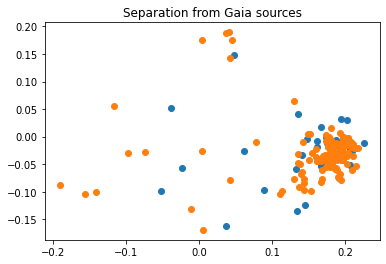

In [32]:
pl.title("Separation from Gaia sources")
pl.scatter(dra, ddec);
pl.scatter(crowddra, crowdddec);

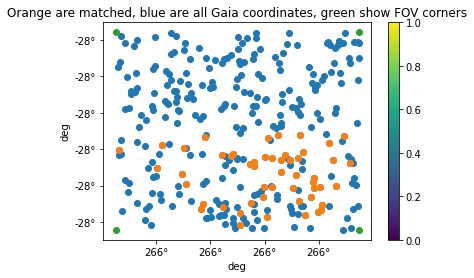

In [33]:
with quantity_support():
    pl.scatter(gaiacrds.ra, gaiacrds.dec)
    pl.scatter(gaiacrds.ra[sidx], gaiacrds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()
    pl.title("Orange are matched, blue are all Gaia coordinates, green show FOV corners")

In [34]:
idx, sidx, sep, sep3d = twomass_crds.search_around_sky(skycrds_cat, 0.2*u.arcsec)

In [35]:
len(idx)

53

In [36]:
dra = skycrds_cat[idx].ra - twomass_crds[sidx].ra
ddec = skycrds_cat[idx].dec - twomass_crds[sidx].dec

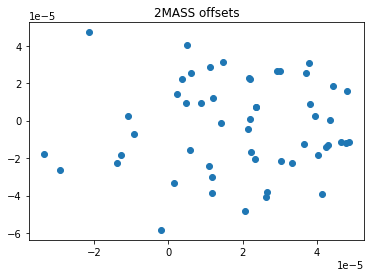

In [37]:
pl.title("2MASS offsets")
pl.scatter(dra, ddec);

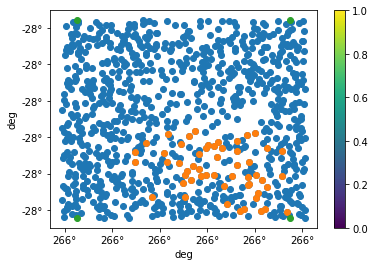

In [38]:
with quantity_support():
    pl.scatter(twomass_crds.ra, twomass_crds.dec)
    pl.scatter(twomass_crds.ra[sidx], twomass_crds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

In [39]:
idx, sidx, sep, sep3d = galnuc2021_crds.search_around_sky(skycrds_cat, 0.2*u.arcsec)

In [40]:
len(idx)

1259

In [41]:
dra = (skycrds_cat[idx].ra - galnuc2021_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[idx].dec - galnuc2021_crds[sidx].dec).to(u.arcsec)

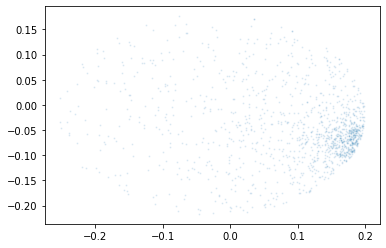

In [42]:
pl.scatter(dra, ddec, s=1, alpha=0.1)

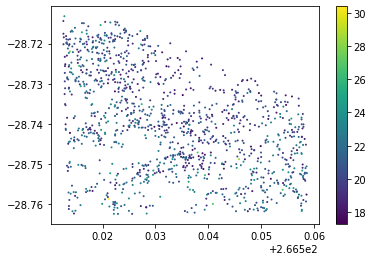

In [43]:
pl.scatter(skycrds_cat[idx].ra, skycrds_cat[idx].dec, c=cat['aper30_abmag'][idx], s=1)
pl.colorbar()

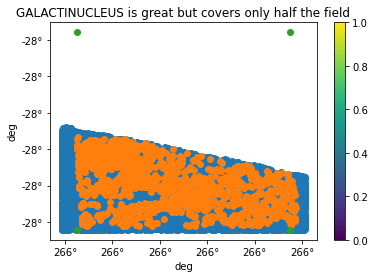

In [44]:
with quantity_support():
    pl.scatter(galnuc2021_crds.ra, galnuc2021_crds.dec)
    pl.scatter(galnuc2021_crds.ra[sidx], galnuc2021_crds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()
    pl.title("GALACTINUCLEUS is great but covers only half the field")

# VVV offsets

I don't understand what I'm seeing here.  In the CARTA catalog overlay, the VVV sources are not offset (for f410m) - they are aligned with the data.  For F405N, the offset is clear

The crowdsource catalog is perfectly aligned.

How can there be an offset in this plot?

The original catalog (``_cat.ecsv``) is produced by the JWST pipeline.

In [45]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat, 0.4*u.arcsec)
downsel = cat['aper_total_vegamag']<15
downselidx, downselsidx, downselsep, downselsep3d = vvvdr2_crds.search_around_sky(skycrds_cat[downsel], 0.4*u.arcsec)

crowdidx, crowdsidx, crowdsep, crowdsep3d = vvvdr2_crds.search_around_sky(skycrds_crowdcat, 0.4*u.arcsec)

In [46]:
len(idx), len(downselidx), len(crowdidx)

(978, 813, 3493)

In [47]:
dra = (skycrds_cat[idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

crowddra = (skycrds_crowdcat[crowdidx].ra - vvvdr2_crds[crowdsidx].ra).to(u.arcsec)
crowdddec = (skycrds_crowdcat[crowdidx].dec - vvvdr2_crds[crowdsidx].dec).to(u.arcsec)

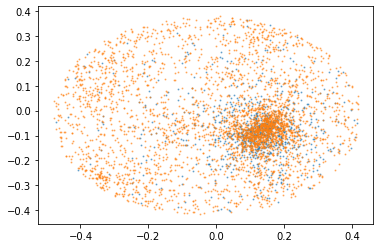

In [48]:
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(crowddra, crowdddec, s=1, alpha=0.5)

In [49]:
downseldra = (skycrds_cat[downsel][downselidx].ra - vvvdr2_crds[downselsidx].ra).to(u.arcsec)
downselddec = (skycrds_cat[downsel][downselidx].dec - vvvdr2_crds[downselsidx].dec).to(u.arcsec)

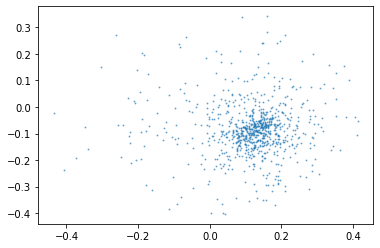

In [50]:
pl.scatter(downseldra, downselddec, s=1, alpha=0.5)
#pl.scatter(crowddra, crowdddec, s=1, alpha=0.5)

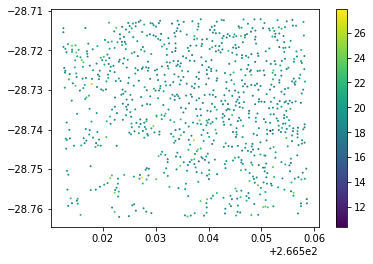

In [51]:
pl.scatter(skycrds_cat[idx].ra, skycrds_cat[idx].dec, c=cat['aper30_abmag'][idx], s=1)
pl.colorbar()

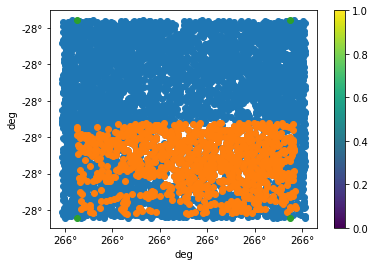

In [52]:
with quantity_support():
    pl.scatter(vvvdr2_crds.ra, vvvdr2_crds.dec)
    pl.scatter(vvvdr2_crds.ra[sidx], vvvdr2_crds.dec[sidx])
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

# VVV

VVV looks pretty good superposed on the images.

The offset is generally <0.2 arcsec, often <0.1, but there's a systematic shift.

The flux range that matches is:

F187N : ~ 500 - 3000 MJy/sr

F182M, F212N: seems ~same-ish

Actually looks same-ish for the long wave too

Argh, what's the MJy/sr conversion?

In [53]:
from astropy.wcs import WCS
from astropy.io import fits

In [54]:
ww =  WCS(fits.getheader(imfile, ext=('SCI', 1)))
pixscale = ww.proj_plane_pixel_area()

Set OBSGEO-B to   -20.646359 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526234830.949 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [55]:
import numpy as np

## Approximate Jy/beam

In [56]:
(u.MJy/u.sr * (2*np.pi * (8*np.log(2)) * 2.5**2 * pixscale)).to(u.Jy)

<Quantity 2.02535435e-05 Jy>

but that doesn't seem to work.

Empirically,

8.5e-5 Jy -> 1933 MJy/sr
1.1e-5 Jy ->  165 MJy/sr
2.1e-5 Jy ->  350 MJy/sr

So there are ~70 nJy / (MJy/sr)

In [57]:
1.1e-5 / 165

6.666666666666667e-08

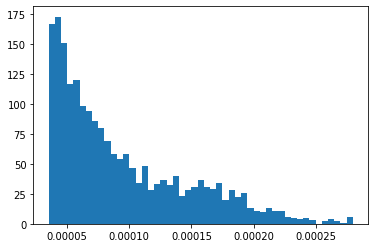

In [58]:
flux = (cat['aper30_abmag'].value * u.ABmag).to(u.Jy)
pl.hist(flux.value, bins=np.linspace(7e-8 * 500, 7e-8 * 4000))
sel = (flux > 7e-8*500*u.Jy) & (flux < 4000*7e-8*u.Jy)

In [59]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat[sel], 0.4*u.arcsec)

In [60]:
len(idx)

590

In [61]:
dra = (skycrds_cat[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

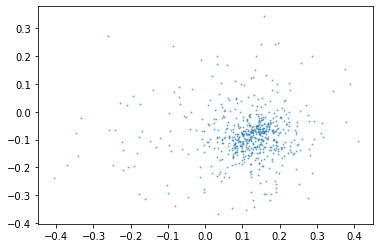

In [62]:
pl.scatter(dra, ddec, s=1, alpha=0.5)

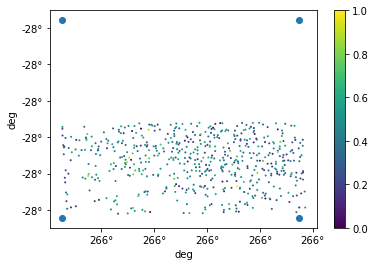

In [63]:
with quantity_support():
    pl.scatter(skycrds_cat[sel][idx].ra, skycrds_cat[sel][idx].dec, c=cat['aper30_abmag'][idx], s=1)
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

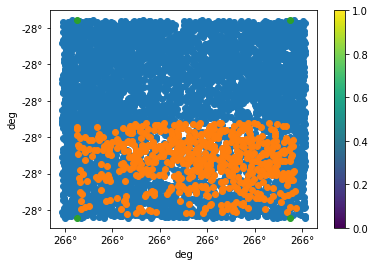

In [64]:
with quantity_support():
    pl.scatter(vvvdr2_crds.ra, vvvdr2_crds.dec)
    pl.scatter(vvvdr2_crds[sidx].ra, vvvdr2_crds[sidx].dec)
    pl.scatter([fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,
                fov[0].center.ra - fov[0].height/2,
                fov[0].center.ra + fov[0].height/2,],
               [fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec - fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,
                fov[0].center.dec + fov[0].width/2,]
              )
    pl.colorbar()

In [65]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat[sel], 0.4*u.arcsec)
dra = (skycrds_cat[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

0.124959arcsec -0.0869446arcsec


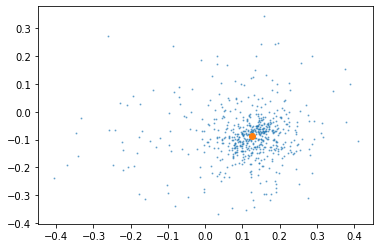

In [66]:
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec))

In [67]:
ww =  WCS(fits.getheader(imfile, ext=('SCI', 1)))
ww.wcs.crval = ww.wcs.crval - [np.median(dra).to(u.deg).value, np.median(ddec).to(u.deg).value]
with fits.open(imfile, mode='update') as hdulist:
    print(hdulist[1].header['CRVAL1'],
          hdulist[1].header['CRVAL2'])
    hdulist[1].header.update(ww.to_header())
    print(hdulist[1].header['CRVAL1'],
          hdulist[1].header['CRVAL2'])

Set OBSGEO-B to   -20.646359 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526234830.949 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


266.53558805313 -28.737315672402
266.53555334221 -28.737291521132


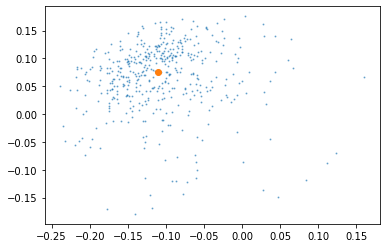

In [68]:
skycrds_cat_new = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])

idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(skycrds_cat_new[sel], 0.2*u.arcsec)
dra = (skycrds_cat_new[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (skycrds_cat_new[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec))

# Check what's happening in the overlap zones

In [69]:
from astropy import wcs

In [70]:
import regions
module_overlap = regions.Regions.read(f'{basepath}/regions/overlap_region.reg')
module_overlap

<Regions([<RectangleSkyRegion(center=<SkyCoord (ICRS): (ra, dec) in deg
    (266.535674, -28.71300934)>, width=11.3759 arcsec, height=150.5041 arcsec, angle=0.0 deg)>])>

In [71]:
import warnings

In [72]:
def check_overlap_zone(filtername = 'f212n'):
    fig = pl.figure(1, figsize=(10,5))
    pl.suptitle(filtername)
    
    ax1 = pl.subplot(1,2,1)
    ax2 = pl.subplot(1,2,2)

    for module in ('nrca', 'nrcb'):
        catfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_cat.ecsv'
        imfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_i2d.fits'
        imfile_realigned = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_realigned-to-refcat.fits'
        cat = Table.read(catfile)
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            ww = wcs.WCS(fits.getheader(imfile_realigned, ext=('SCI', 1)))
        
        skycrds_cat = cat['sky_centroid']
        realigned_skycrds = ww.pixel_to_world(cat['xcentroid'], cat['ycentroid'])
        
        for crds, ax, title in [(skycrds_cat, ax1, 'original'),
                                (realigned_skycrds, ax2, 'realigned')]:
            ax.set_title(title)
            sel = module_overlap[0].contains(crds, ww)

            idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(crds, 0.3*u.arcsec)

            dra_all = (crds[idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
            ddec_all = (crds[idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

            idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(crds[sel], 0.3*u.arcsec)

            dra = (crds[sel][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
            ddec = (crds[sel][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)

            ax.axhline(0, color='k', linestyle=':')
            ax.axvline(0, color='k', linestyle=':')
            ax.scatter(dra_all, ddec_all, s=1, alpha=0.2, label=module)
            ax.scatter(dra, ddec, s=3, alpha=0.5, marker='s', label=module)
            ax.scatter(np.median(dra), np.median(ddec), marker='x', s=100)
            ax.axis([-0.3, 0.3, -0.3, 0.3])
    return fig

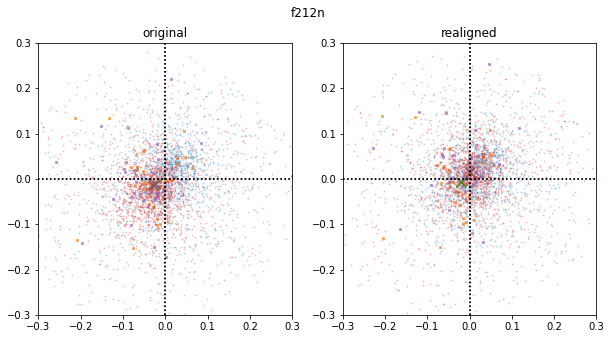

In [73]:
check_overlap_zone('f212n');

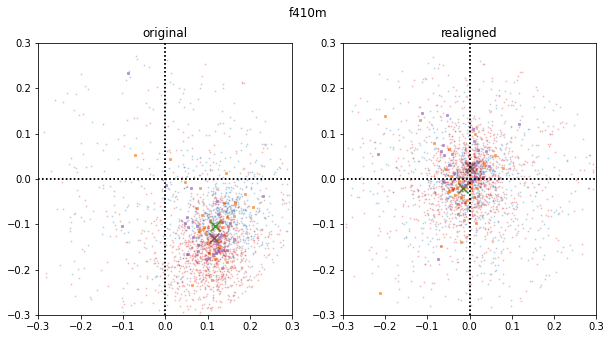

In [74]:
check_overlap_zone('f410m');

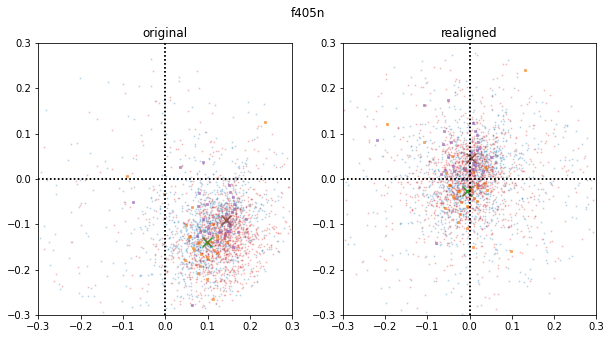

In [75]:
check_overlap_zone('f405n');

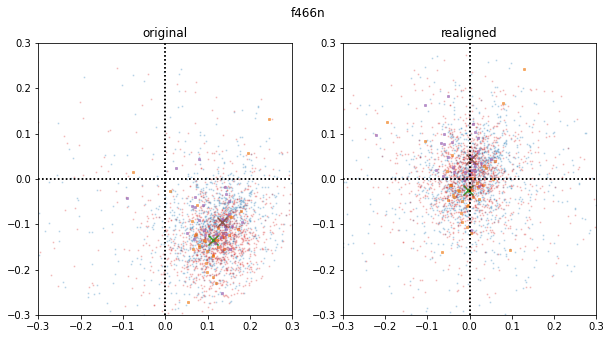

In [76]:
check_overlap_zone('f466n');

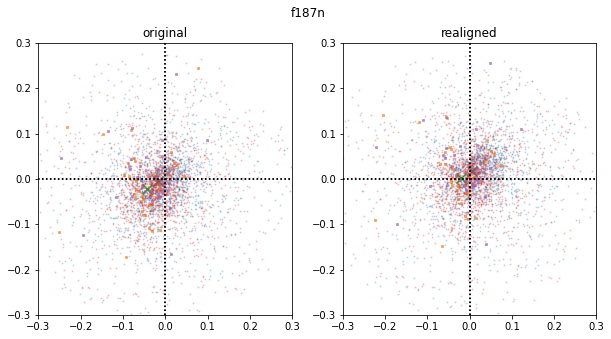

In [77]:
check_overlap_zone('f187n');

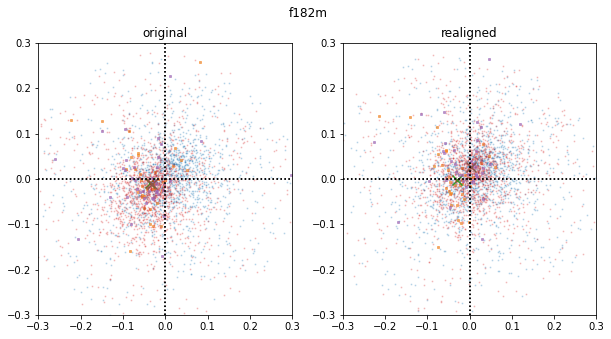

In [78]:
check_overlap_zone('f182m');

# "Production Run" test 

In [79]:
%run $basepath/reduction/align_to_catalogs.py

<Figure size 432x288 with 0 Axes>

In [80]:
main()

2023-07-03T14:07:58.564243:
2023-07-03T14:07:58.564270: Filter = f405n
2023-07-03T14:07:58.564280: f405n nrca
INFO: Realigning to vvv (module=nrca [unknown]
INFO: Kept 3642 out of 4693 VVV stars using ksmag_limit>11 [unknown]
INFO: For f405n nrca 001 catalog /orange/adamginsburg/jwst/brick//F405N/pipeline/jw02221-o001_t001_nircam_clear-f405n-nrca_cat.ecsv, found 4125 of 5012 sources meeting criteria mag<15 [unknown]
2023-07-03T14:07:59.926031: Before realignment, offset is 0.10568937627795094 arcsec, -0.11083915498701913 arcsec.  Found 1140 matches.
2023-07-03T14:07:59.932191: CRVAL before 266.5356152731974 -28.73734529752632
2023-07-03T14:07:59.937440: CRVAL after 266.53558591504 -28.737314508872
2023-07-03T14:08:00.032614: After realignment, offset is 4.58731165053905e-05 arcsec, -0.002655147142149872 arcsec
2023-07-03T14:08:00.038322: CRVAL before 266.53558591504 -28.737314508872
2023-07-03T14:08:00.043723: CRVAL after 266.5355859023 -28.737313771331
2023-07-03T14:08:00.147305: Afte

In [81]:
# do this in a dedicated slurm job

# TEST aligning using tweakreg

In [82]:
from tweakwcs import JWSTgWCS, align_wcs, JWSTWCSCorrector, FITSWCSCorrector
from astropy.table import Table
from jwst.datamodels import ImageModel

# to update FITS WCS of the data models next import
# requires installing dev version of the pipeline
from jwst.assign_wcs.util import update_fits_wcsinfo


# This only works with L2 files

In [83]:
dm1 = ImageModel(imfile)
dm1.meta.wcs.available_frames

['detector', 'world']

In [84]:
imcat1 = cat
imcat1['x'] = imcat1['xcentroid']
imcat1['y'] = imcat1['ycentroid']
refcat = vvvdr2
refcat['RA'] = refcat['RAJ2000']
refcat['DEC'] = refcat['DEJ2000']

corr1 = FITSWCSCorrector(dm1.get_fits_wcs(),# dm1.meta.wcsinfo.instance,
                 meta={'catalog': imcat1, 'group_id': 1})

# align images to the reference catalog:
aligned_cat = align_wcs([corr1,], refcat=refcat) # + add other arguments as needed - see docs

2023-07-03 14:10:50,065 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.508342 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.646359 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526234830.949 from OBSGEO-[XYZ]'.
  warnings.warn(

2023-07-03 14:10:50,069 - stpipe - INFO -  
2023-07-03 14:10:50,071 - stpipe - INFO - ***** tweakwcs.imalign.align_wcs() started on 2023-07-03 14:10:50.069537
2023-07-03 14:10:50,072 - stpipe - INFO -       Version 0.8.3.dev2+ga9bf1b1
2023-07-03 14:10:50,074 - stpipe - INFO -  
2023-07-03 14:10:50,392 - stpipe - INFO - Aligning image catalog 'GROUP ID: 1' to the reference catalog.
2023-07-03 14:10:50,403 - stpipe - INFO - Running XYXYMatch.__call__
2023-07-03 14:10:50,405 - stpipe - INFO - Matching sources from 'Unknown' catalog with sources from the reference 'II/348/vvv2' catalog.
2023-07-03 14:10:50,407 - stpipe - INFO - Estimating offset using 2dhist_shift
2023-07

INFO: running stimage.xyxymatch [stsci.stimage]


dm1.meta.wcs = corr1.wcs
update_fits_wcsinfo(dm1, npoints=16) # <- update FITS WCS too (optionally). Repeat for each model below

# save image models to different files but one can also overwrite existing models:
#dm1.write(imfile.replace(".fits", "_wcscorrected_vvv.fits"))

# Crossmatch F212N with VVV, then we'll save that and use it as our reference case


Work done Oct 20, 2022

Idea is to establish a new and *usable* master table, since VVV stars are mostly saturated in JW.

In [85]:
basepath = '/blue/adamginsburg/adamginsburg/jwst/brick'

In [86]:
cd $basepath

/blue/adamginsburg/adamginsburg/jwst/brick


In [87]:
filtername = 'f212n'
module = 'nrca'
catfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_cat.ecsv'
imfile = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-{module}_i2d.fits'
cat = Table.read(catfile)
#cat.write(catfile.replace('ecsv', 'fits'), overwrite=True) # for CARTA viewing

Catalogs:

 * F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_cat.ecsv
 * F212N/f212n_?merged?_crowdsource.fits doesn't exist yet
 * F212N/f212n_?merged?_daophot_iterative.fits doesn't exist yet

In [88]:
# TODO: replace nrca w/full

crowdtbl = Table.read('F212N/f212n_nrca_crowdsource.fits')
crowdheader = fits.getheader('F212N/f212n_nrca_crowdsource.fits')
daobasictbl = Table.read('F212N/f212n_nrca_daophot_basic.fits')
daoitertbl = Table.read('F212N/f212n_nrca_daophot_iterative.fits')
len(crowdtbl), len(daobasictbl), len(daoitertbl)

(152674, 128686, 161311)

In [89]:
if 'skycoord' not in crowdtbl.colnames:
    print ("Swapping coords")
    # I've now fixed crowdtbl to include skycoord, but it hasn't run yet
    ww = wcs.WCS(crowdheader)
    # crowdtbl are still backwards now
    crowdtbl['skycoord'] = ww.pixel_to_world(crowdtbl['y'], crowdtbl['x'])

In [90]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(daobasictbl['skycoord_centroid'], 0.5*u.arcsec)
dra = (daobasictbl['skycoord_centroid'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (daobasictbl['skycoord_centroid'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-07-03T14:10:53.786732: -0.0214254arcsec -0.0149147arcsec


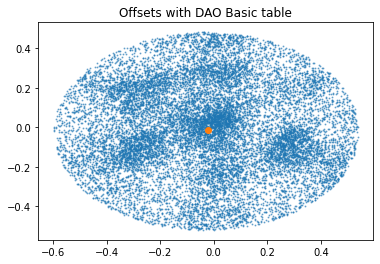

In [91]:
pl.title("Offsets with DAO Basic table")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec));

In [92]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(daoitertbl['skycoord_centroid'], 0.5*u.arcsec)
dra = (daoitertbl['skycoord_centroid'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (daoitertbl['skycoord_centroid'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-07-03T14:10:54.313657: -0.0265499arcsec -0.0174674arcsec


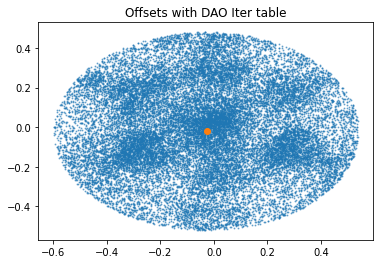

In [93]:
pl.title("Offsets with DAO Iter table")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec));

In [94]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(crowdtbl['skycoord'], 0.5*u.arcsec)
dra = (crowdtbl['skycoord'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (crowdtbl['skycoord'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-07-03T14:10:54.822760: -0.0185652arcsec -0.0130552arcsec


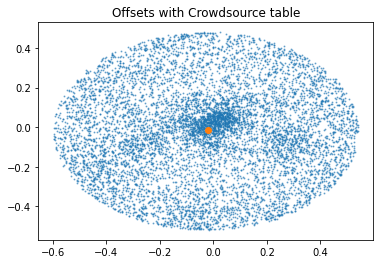

In [95]:
pl.title("Offsets with Crowdsource table")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(np.median(dra), np.median(ddec));

### Intermediate conclusions:

The iter table performed best but still quite poorly.  Only matches within <0.15 arcsec are remotely valid, so more source rejection is needed to get a good result.

In [96]:
satstarcat = Table.read('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d_satstar_catalog.fits')
if 'skycoord_fit' not in satstarcat.colnames:
    ww = WCS(fits.getheader('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d.fits', ext=('SCI', 1)))
    satstarcat['skycoord_fit'] = ww.pixel_to_world(satstarcat['x_fit'], satstarcat['y_fit'])
    satstarcat.write('F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged_i2d_satstar_catalog.fits', overwrite=True)
satstarcat[:5]

x_0,y_0,flux_0,id,group_id,x_fit,y_fit,flux_fit,flux_unc,x_0_unc,y_0_unc,skycoord_fit
,,,,,,,,,,,"deg,deg"
float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,SkyCoord
4391.923076923077,2451.5384615384614,5174833.647246733,1,1,4392.459260599271,2451.507728803092,27954050.827463385,136570.70481297298,0.005558726579193727,0.005228099197524604,"266.5360734136199,-28.72514270150935"
3300.0,1834.5,2287703.654262431,1,1,3300.0834777269906,1834.3630378253467,6556245.9895053515,10573.031356195463,0.0024906121061280856,0.0022014837799540494,"266.52997919040206,-28.734609415000282"
6253.6,2440.4,3154032.5878370623,2,2,6253.784259513021,2440.108662520269,10000018.299960371,18211.174862164375,0.0029113526201105357,0.002191941729747003,"266.5359540261991,-28.709015304416134"
7008.153846153846,3542.230769230769,2732817.029441739,3,3,7008.06628740913,3542.046285486968,8342037.992809761,12841.767147964018,0.0027452309625178558,0.0022714867654633443,"266.5468365362325,-28.702475889924038"
358.5,4386.0,2707601.9413301367,4,4,358.622934151952,4385.909698009303,8685629.304713907,18396.157207251577,0.002793513177398203,0.0028535303265473403,"266.55520720246426,-28.76008630445226"


### Try to reject sources near saturated sources (about 0.4" in F4* and 0.95" (?!?!) in F1*)

In [97]:
satcrd = satstarcat['skycoord_fit']
daoitercrd = daoitertbl['skycoord_centroid']
idx_s, sidx_s, sep_s, sep3d_s = satcrd.search_around_sky(daoitertbl['skycoord_centroid'], 0.95*u.arcsec)
len(idx_s), len(sidx_s), len(sep_s), len(sep3d_s)

(5610, 5610, 5610, 5610)

In [98]:
inds = np.arange(len(daoitercrd))
unsat_inds = inds[~np.in1d(inds, idx_s)]
#daoitercrd_nosat = daoitercrd[unsat_inds]
daoitertbl_nosat = daoitertbl[unsat_inds]

In [99]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(daoitertbl['skycoord_centroid'], 0.5*u.arcsec)
sat_idx = np.isin(idx, idx_s)
dra = (daoitertbl['skycoord_centroid'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (daoitertbl['skycoord_centroid'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
dra_s = (daoitertbl['skycoord_centroid'][idx[sat_idx]].ra - vvvdr2_crds[sidx[sat_idx]].ra).to(u.arcsec)
ddec_s = (daoitertbl['skycoord_centroid'][idx[sat_idx]].dec - vvvdr2_crds[sidx[sat_idx]].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-07-03T14:10:55.860504: -0.0265499arcsec -0.0174674arcsec


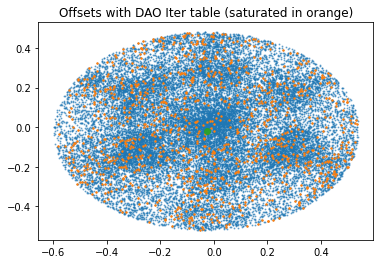

In [100]:
pl.title("Offsets with DAO Iter table (saturated in orange)")
pl.scatter(dra, ddec, s=1, alpha=0.5)
pl.scatter(dra_s, ddec_s, s=2, alpha=1)
pl.scatter(np.median(dra), np.median(ddec));

## Try to match saturated star centroids

In [101]:
satcrd = satstarcat['skycoord_fit']
idx_s, sidx_s, sep_s, sep3d_s = satcrd.search_around_sky(vvvdr2_crds, 0.5*u.arcsec)
dra_s = (satcrd[sidx_s].ra - vvvdr2_crds[idx_s].ra).to(u.arcsec)
ddec_s = (satcrd[sidx_s].dec - vvvdr2_crds[idx_s].dec).to(u.arcsec)
len(idx_s), len(satcrd), len(vvvdr2_crds)

(78, 157, 4693)

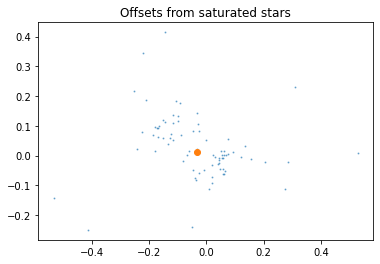

In [102]:
pl.title("Offsets from saturated stars")
pl.scatter(dra_s, ddec_s, s=1, alpha=0.5)
pl.scatter(np.median(dra_s), np.median(ddec_s));

In [103]:
# for each coordinate in DAO catalog, find VVV match (for plotting)
daoitercrd_nosat = daoitertbl_nosat['skycoord_centroid']
idx, sidx, sep, sep3d = daoitercrd_nosat.search_around_sky(vvvdr2_crds, 0.5*u.arcsec)
dra = (daoitercrd_nosat[sidx].ra - vvvdr2_crds[idx].ra).to(u.arcsec)
ddec = (daoitercrd_nosat[sidx].dec - vvvdr2_crds[idx].dec).to(u.arcsec)
len(idx), len(daoitercrd), len(vvvdr2_crds)

(25402, 161311, 4693)

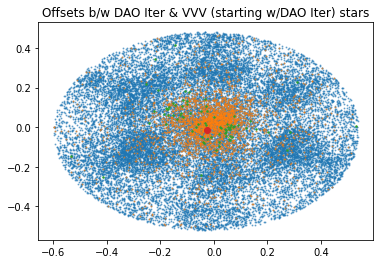

In [104]:
pl.title("Offsets b/w DAO Iter & VVV (starting w/DAO Iter) stars")
pl.scatter(dra, ddec, s=1, alpha=0.5)
bright = daoitertbl_nosat['flux_fit'][sidx] > 1e4
pl.scatter(dra[bright], ddec[bright], s=1, alpha=0.5)
pl.scatter(dra_s, ddec_s, s=2, alpha=1)
pl.scatter(np.median(dra), np.median(ddec));

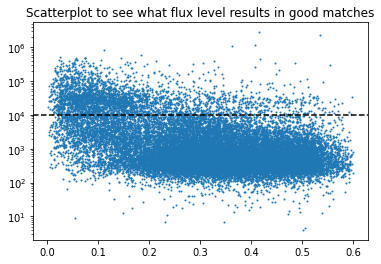

In [105]:
pl.title("Scatterplot to see what flux level results in good matches")
pl.scatter((dra**2 + ddec**2)**0.5, daoitertbl_nosat['flux_fit'][sidx], s=1)
pl.semilogy();
pl.axhline(1e4, color='k', linestyle='--');

In [106]:
# for each coordinate in DAO catalog, find VVV match (for saving)
daoitercrd_nosat = daoitertbl_nosat['skycoord_centroid']
bright = daoitertbl_nosat['flux_fit'] > 1e4
idxd, sepd, _ = daoitercrd_nosat[bright].match_to_catalog_sky(vvvdr2_crds)

drad = (daoitercrd_nosat[bright].ra - vvvdr2_crds[idxd].ra).to(u.arcsec)
ddecd = (daoitercrd_nosat[bright].dec - vvvdr2_crds[idxd].dec).to(u.arcsec)

# then, for each vvv object, find the closest DAO
idxv, sepv, _ = vvvdr2_crds.match_to_catalog_sky(daoitercrd_nosat[bright])
drav = (daoitercrd_nosat[bright][idxv].ra - vvvdr2_crds.ra).to(u.arcsec)
ddecv = (daoitercrd_nosat[bright][idxv].dec - vvvdr2_crds.dec).to(u.arcsec)

len(idxd), len(idxv), bright.sum(), len(vvvdr2_crds)

(5428, 4693, 5428, 4693)

(-0.5, 0.5, -0.5, 0.5)

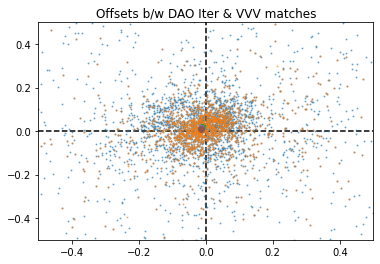

In [107]:
pl.title("Offsets b/w DAO Iter & VVV matches")
pl.scatter(drad, ddecd, s=1, alpha=0.5)
pl.scatter(drav, ddecv, s=1, alpha=0.5)
pl.scatter(np.median(drad), np.median(ddecd));
pl.scatter(np.median(drav), np.median(ddecv));
pl.scatter(np.median(drad[sepd<0.15*u.arcsec]), np.median(ddecd[sepd<0.15*u.arcsec]));
pl.scatter(np.median(drav[sepv<0.15*u.arcsec]), np.median(ddecv[sepv<0.15*u.arcsec]));
pl.axhline(0, color='k', linestyle='--', zorder=-5)
pl.axvline(0, color='k', linestyle='--', zorder=-5);
pl.axis([-0.5,0.5,-0.5,0.5])

# Conclusions again: There's no offset?

So, what the hell?  Why do the catalogs _look_ so offset when overlaid on the data?

Maybe it's just that the catalogs have never run to completion on the final data.

## Revisiting VVV x-matching June 28, 2023

Examining the VVV catalog overlaid on the realigned catalogs in `refcat_to_410_check` in CARTA, it looks like there are very few stars that actually get matched to JWST stars reasonably.

So a more careful treatment of the x-matching is needed.


Manual inspection, going 12..13, 14..15, etc., the first magnitude bin that is OK for F410M is 15..16, so >15 seems appropriate.

For F405N, though, >11 mag works

# Some plots for the paper

todo - show that offset ~ zero

In [108]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [109]:
import sys
if '' in sys.path:
    sys.path.remove('')

In [110]:
%run $basepath/analysis/analysis_setup.py
basetable = basetable_merged

2023-07-03 14:10:57,987 - stpipe - WARNING - /orange/adamginsburg/jwst/brick/analysis/analysis_setup.py:4: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import sys, imp

2023-07-03 14:10:59,654 - stpipe - WARNING - /orange/adamginsburg/jwst/brick//reduction/filtering.py:20: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm

2023-07-03 14:11:08,403 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'obsfix' made the change 'Set OBSGEO-L to   -51.508342 from OBSGEO-[XYZ].
Set OBSGEO-B to   -20.646359 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526234830.949 from OBSGEO-[XYZ]'.
  warnings.warn(

2023-07-03 14:11:08,416 - stpipe - WARNING - /blue/adamginsburg/adamginsburg/repos/astropy/astropy/wcs/wcs.py:819: FITSFixedWarning: 'da

For module nrca catalog crowdsource_nsky0_nrca_photometry_tables_merged.fits, mod date is 2023-07-02 15:15:12
For module nrcb catalog crowdsource_nsky0_nrcb_photometry_tables_merged.fits, mod date is 2023-07-02 15:42:44
For module merged catalog crowdsource_nsky0_merged_photometry_tables_merged.fits, mod date is 2023-07-02 13:40:54
For module merged-reproject catalog crowdsource_nsky0_merged-reproject_photometry_tables_merged.fits, mod date is 2023-07-02 09:17:00


<Figure size 1000x800 with 0 Axes>

In [111]:
%run $basepath/analysis/selections.py --module=merged
assert len(basetable) == len(basetable_merged)

For module nrca catalog crowdsource_nsky0_nrca_photometry_tables_merged.fits, mod date is 2023-07-02 15:15:12
For module nrcb catalog crowdsource_nsky0_nrcb_photometry_tables_merged.fits, mod date is 2023-07-02 15:42:44
For module merged catalog crowdsource_nsky0_merged_photometry_tables_merged.fits, mod date is 2023-07-02 13:40:54
For module merged-reproject catalog crowdsource_nsky0_merged-reproject_photometry_tables_merged.fits, mod date is 2023-07-02 09:17:00
Selecting module merged

NRCA
483 saturated in near_saturated_f212n_f212n
38 saturated in near_saturated_f466n_f466n
698 saturated in near_saturated_f405n_f405n
310 saturated in near_saturated_f187n_f187n
3761 saturated in near_saturated_f182m_f182m
6551 near saturated out of 330581.  That leaves 324030 not near unsaturated
69 saturated in replaced_saturated_f212n
9 saturated in replaced_saturated_f466n
162 saturated in replaced_saturated_f405n
19 saturated in replaced_saturated_f187n
104 saturated in replaced_saturated_f182m


In [112]:
idx, sidx, sep, sep3d = vvvdr2_crds.search_around_sky(basetable['skycoord_f410m'], 0.5*u.arcsec)
dra = (basetable['skycoord_f410m'][idx].ra - vvvdr2_crds[sidx].ra).to(u.arcsec)
ddec = (basetable['skycoord_f410m'][idx].dec - vvvdr2_crds[sidx].dec).to(u.arcsec)
print(np.median(dra), np.median(ddec))

2023-07-03T14:11:49.881528: -0.0064999arcsec 0.00328813arcsec


In [113]:
%run $basepath/reduction/align_to_catalogs.py

In [114]:
vvvdr2_crds, vvvdr2 = retrieve_vvv(basepath=basepath, filtername=filtername, module='merged',
                                   fov_regname='regions/nircam_brick_fov.reg')
reference_coordinates = vvvdr2_crds

In [115]:
skycrds_cat = basetable['skycoord_f410m']
skycrds_cat_mrgrep = basetable_merged_reproject['skycoord_f410m']
skycrds_cat_a = basetable_nrca['skycoord_f410m']
skycrds_cat_b = basetable_nrcb['skycoord_f410m']
idx, sidx, sep, sep3d = reference_coordinates.search_around_sky(skycrds_cat[all_good], 0.4*u.arcsec)
idxmr, sidxmr, sepmr, sep3dmr = reference_coordinates.search_around_sky(skycrds_cat_mrgrep[all_good_mr], 0.4*u.arcsec)
idxa, sidxa, sepa, sep3da = reference_coordinates.search_around_sky(skycrds_cat_a[all_good_a], 0.4*u.arcsec)
idxb, sidxb, sepb, sep3db = reference_coordinates.search_around_sky(skycrds_cat_b[all_good_b], 0.4*u.arcsec)

In [116]:
len(skycrds_cat), len(basetable), len(vvvdr2), sel.sum(), idx.max(), sidx.max()

(530916, 530916, 4693, 778, 50187, 4687)

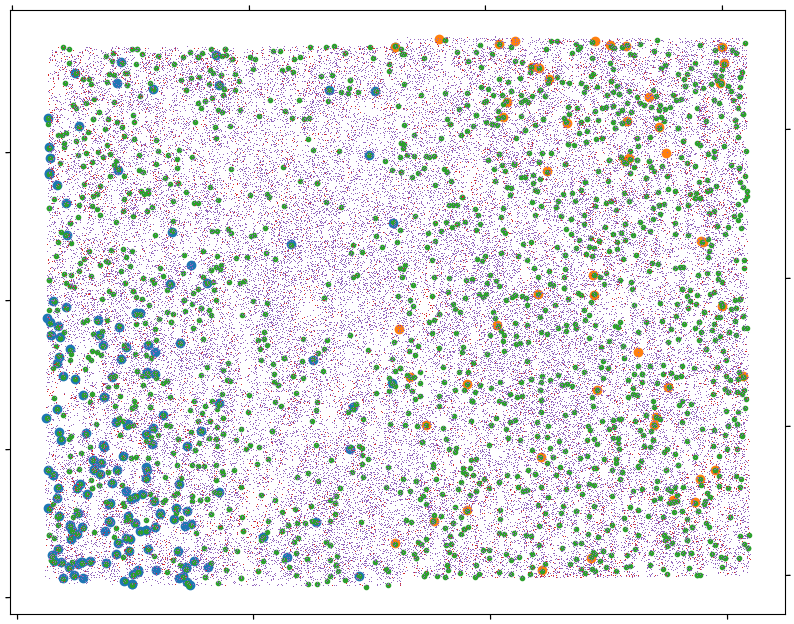

In [117]:
ax = pl.subplot(projection=ww_merged)
ax.plot_coord(skycrds_cat_a[all_good_a][idxa], 'o')
ax.plot_coord(skycrds_cat_b[all_good_b][idxb], 'o')
ax.plot_coord(vvvdr2_crds[sidx], '.')
ax.plot_coord(skycrds_cat[all_good], ',')
ax.plot_coord(skycrds_cat_mrgrep[all_good_mr], ',')

# Flux Calibration Check

### F212 vs VVVK plot

There are significant differences betwen NRCA, NRCB, and merged.

They are strict offsets in magnitude, so I guess multiplicative?

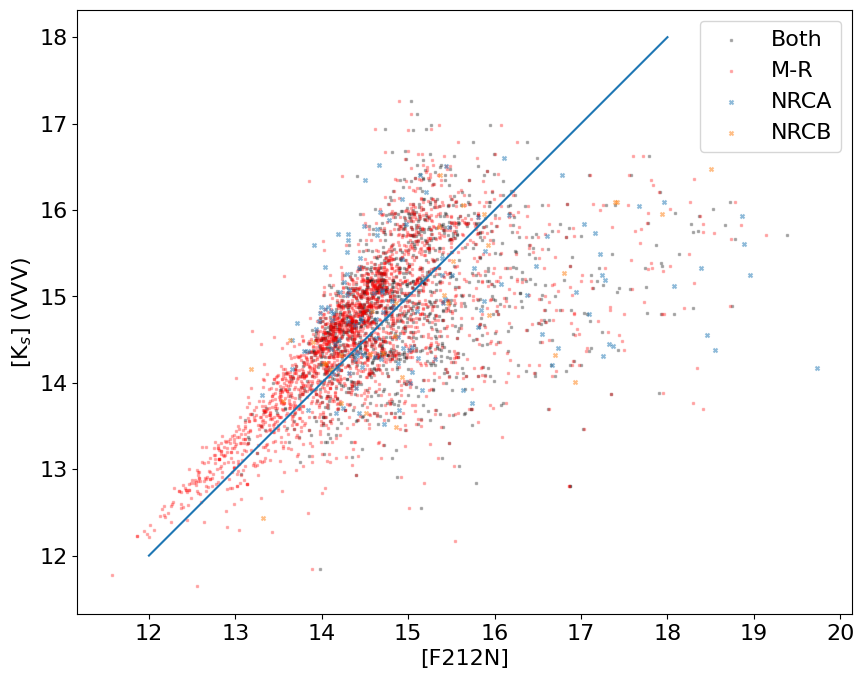

In [118]:
pl.scatter(basetable['mag_ab_f212n'][all_good][idx], vvvdr2['Ksmag3'][sidx], marker=',', s=1, alpha=0.25, color='k', label='Both')
pl.scatter(basetable_merged_reproject['mag_ab_f212n'][all_good_mr][idxmr], vvvdr2['Ksmag3'][sidxmr],
           marker=',', s=1, alpha=0.25, color='r', label='M-R')
pl.scatter(basetable_nrca['mag_ab_f212n'][all_good_a][idxa], vvvdr2['Ksmag3'][sidxa], marker='x', s=8, alpha=0.5, label='NRCA')
pl.scatter(basetable_nrcb['mag_ab_f212n'][all_good_b][idxb], vvvdr2['Ksmag3'][sidxb], marker='x', s=8, alpha=0.5, label='NRCB')
pl.plot([12,18], [12,18])
pl.legend(loc='best')
pl.xlabel("[F212N]")
pl.ylabel("[K$_s$] (VVV)");

#### Why are there sources in 'basetable' not in nrca/nrcb?

## Using the "good" merged table, compare NRCA/NRCB fluxes

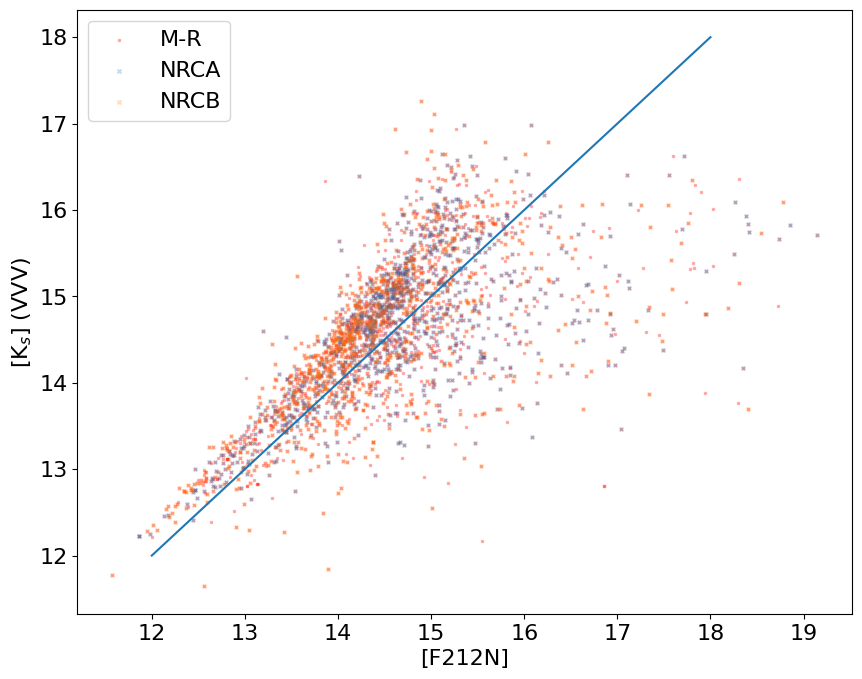

In [119]:
nrcasel = regions.Regions.read('regions/brick_nrca.reg')[0].contains(skycrds_cat_mrgrep[all_good_mr][idxmr], ww_mr)
nrcbsel = regions.Regions.read('regions/brick_nrcb.reg')[0].contains(skycrds_cat_mrgrep[all_good_mr][idxmr], ww_mr)
pl.scatter(basetable_merged_reproject['mag_ab_f212n'][all_good_mr][idxmr], vvvdr2['Ksmag3'][sidxmr],
           marker=',', s=1, alpha=0.25, color='r', label='M-R')
pl.scatter(basetable_merged_reproject['mag_ab_f212n'][all_good_mr][idxmr][nrcasel], vvvdr2['Ksmag3'][sidxmr][nrcasel],
           marker='x', s=8, alpha=0.25,  label='NRCA')
pl.scatter(basetable_merged_reproject['mag_ab_f212n'][all_good_mr][idxmr][nrcbsel], vvvdr2['Ksmag3'][sidxmr][nrcbsel],
           marker='x', s=8, alpha=0.25,  label='NRCB')
pl.plot([12,18], [12,18])
pl.legend(loc='best')
pl.xlabel("[F212N]")
pl.ylabel("[K$_s$] (VVV)");

Now it looks like there's no problem, just an expected wavelength-driven offset